In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

import seaborn as sns
import mapclassify as mc
import matplotlib.pyplot as plt
import folium

import matplotlib.colors as colors


In [2]:
sns.set_theme()
# sns.set_style('white')
sns.set_context("paper", font_scale = 1)

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
plt.rcParams['svg.fonttype'] = 'none'

In [3]:
# dataset = pd.read_pickle('../../geodata/results/02_spatial_lagged_master.pkl')
dataset = pd.read_pickle('../../../geodata/results/02_spatial_lagged_master.pkl')

# ch_g2g18  = gpd.read_file('../../geodata/ch_districts/ch_districts_g2g18.gpkg')
ch_g2g18  = gpd.read_file('../../../geodata/ch_districts/ch_districts_g2g18.gpkg')


In [4]:
# dataset['z'] = dataset.groupby('GMDNAME')['XGB'].transform(lambda x: (x - x.median()) / x.std())
dataset['z'] = (dataset.XGB - dataset.XGB.mean() )/ dataset.XGB.std()
dataset['nz'] = (dataset.nabr_avg_pred - dataset.nabr_avg_pred.mean() )/ dataset.nabr_avg_pred.std()

dataset['err'] = np.log(dataset['XGB'] - dataset['net_income_ptp'])
dataset['nerr'] = np.log(dataset['nabr_avg_pred'] - dataset['net_income_ptp'])

dataset['zrr'] = dataset.groupby('GMDNAME')['err'].transform(lambda x: np.log(x - x.median()))

/Users/adamswietek/opt/anaconda3/envs/env_intel_sdb/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/adamswietek/opt/anaconda3/envs/env_intel_sdb/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/adamswietek/opt/anaconda3/envs/env_intel_sdb/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/adamswietek/opt/anaconda3/envs/env_intel_sdb/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/adamswietek/opt/anaconda3/envs/env_intel_sdb/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encou

<Axes: xlabel='nz', ylabel='Count'>

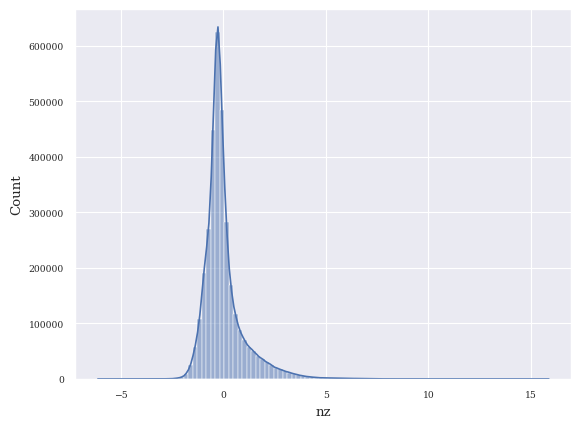

In [90]:
sns.histplot(dataset, x='nz', bins=100, kde=True)

In [66]:
sel_10agglo_lst = dataset.groupby(['Agglo_Name','Rich_Nabr'])['GMDNR'].size().unstack().sort_values(by = 'R', ascending = False).head(10).index.tolist()

<Axes: >

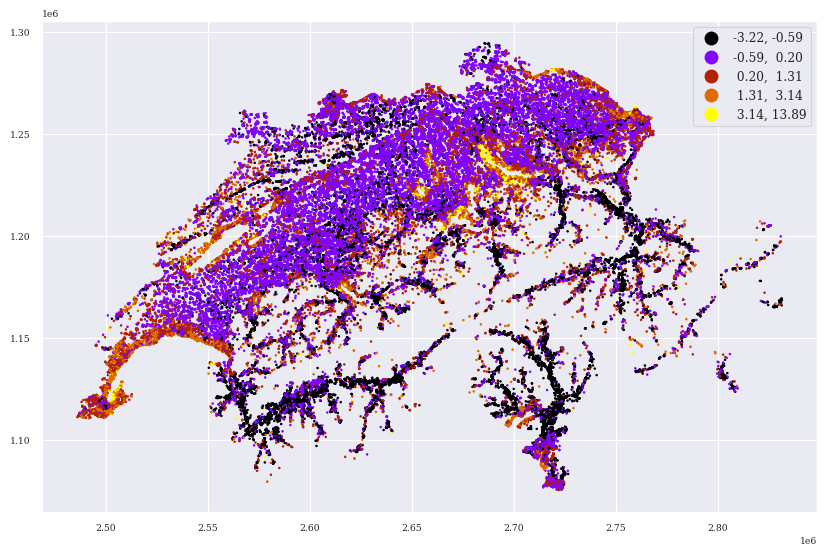

In [126]:
tgt = 'nz'
vmin, vmax, vcenter = dataset[tgt].min(), dataset[tgt].max(), 0
# colors.CenteredNorm(vmin = vmin, vcenter=0, vmax=vmax)
norm = colors.CenteredNorm(vcenter=0)
dataset.sample(100000).plot(tgt, cmap = 'gnuplot', s = 1, legend=True, figsize = (10,10) ,scheme ='naturalbreaks',#norm = norm,
                        # legend_kwds={'label': "VC", 'location':'bottom','orientation': "horizontal", 'shrink': 0.5}
                        )



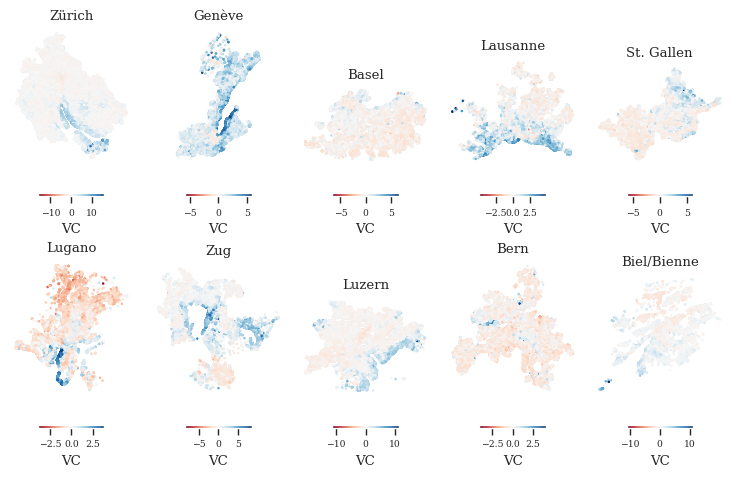

In [127]:
f, ax = plt.subplots(2,5, figsize=(7.5,5))
ax = ax.flatten()
for ix, agglo in enumerate(sel_10agglo_lst):
    # gmd = "Lausanne"#sel_10agglo_lst[8]
    tgt = 'nz'
    x = dataset.query("Agglo_Name == @agglo")
    # g = ch_g2g18.query("GMDNAME == @gmd")
    # normalize color
    g = dataset.query("Agglo_Name == @sel_10agglo_lst")
    vmin, vmax, vcenter = g[tgt].min(), g[tgt].max(), 0
    # norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
    norm = colors.CenteredNorm(vcenter=0)

    # g.plot(color='lightgrey', edgecolor='black', figsize=(5, 5), ax = ax)
    x.plot(column=tgt, cmap = 'RdBu', s = 1, legend=True, ax = ax[ix], norm= norm,
                        legend_kwds={'label': "VC", 'location':'bottom','orientation': "horizontal", 'shrink': 0.5})

    ax[ix].set_title(agglo)
    ax[ix].set_axis_off()
plt.tight_layout()

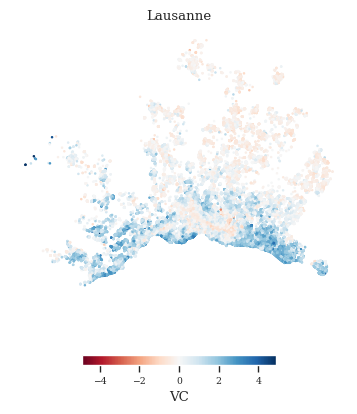

In [111]:

f, ax = plt.subplots(1, figsize=(5, 5))
gmd = "Lausanne"#sel_10agglo_lst[8]
tgt = 'nz'
x = dataset.query("Agglo_Name == @gmd")
# g = ch_g2g18.query("GMDNAME == @gmd")
# normalize color
vmin, vmax, vcenter = x[tgt].min(), x[tgt].max(), 0
# norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
norm = colors.CenteredNorm(vcenter=0)

# g.plot(color='lightgrey', edgecolor='black', figsize=(5, 5), ax = ax)
x.plot(column=tgt, cmap = 'RdBu', s = 1, legend=True, figsize=(5, 5), ax = ax, norm = norm,
                    legend_kwds={'label': "VC", 'location':'bottom','orientation': "horizontal", 'shrink': 0.5})

ax.set_title(gmd)
ax.set_axis_off()

<Axes: xlabel='XGB', ylabel='nabr_avg_pred'>

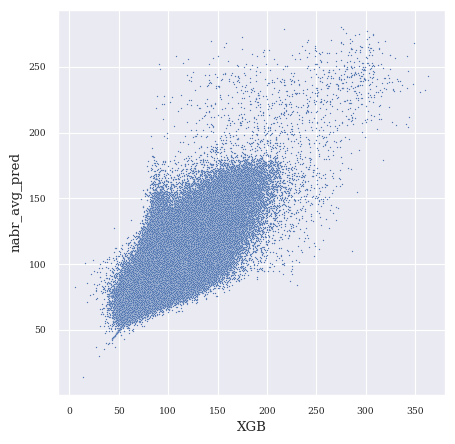

In [51]:
f, ax = plt.subplots(1, figsize=(5, 5))
sns.scatterplot(data = dataset, x = 'zrr', y = 'nabr_avg_pred', s = 1, ax = ax)

ax.set_ylabel('neighbourhood average'), ax.set_xlabel('predicted value')
